In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('D:/Machine Learning/Data/NSE-TATAGLOBAL11.csv' , encoding = "ISO-8859-1")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df['Date'] = pd.to_datetime(df.Date)

In [5]:
df.head()
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


<Figure size 5760x5760 with 0 Axes>

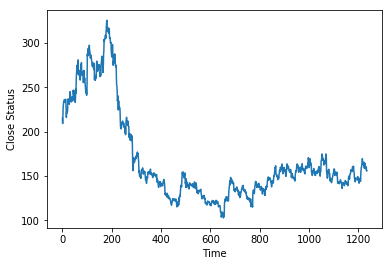

<Figure size 5760x5760 with 0 Axes>

In [6]:

plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Status')
plt.figure(figsize=(80,80))


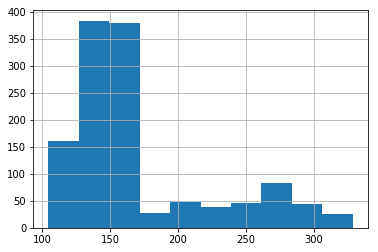

In [7]:
df['High'].hist()


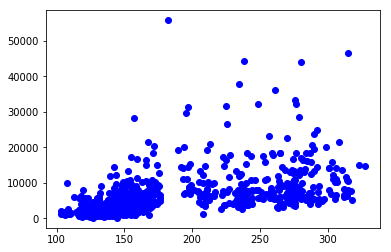

In [8]:
plt.scatter(df['Open'] , df['Turnover (Lacs)'] , color = 'b')

In [9]:
from sklearn import preprocessing
X = df[['Open','High','Low','Last','Close','Total Trade Quantity']]

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [11]:
y = df['Turnover (Lacs)']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 4 )
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (988, 6) (988,)
Test set: (247, 6) (247,)


In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)

print('Intercept:', regr.intercept_ )
print('Coefficients: ',regr.coef_)


Intercept: 4823.9888009937495
Coefficients:  [-3024.50112562  5641.21399227  -519.39721801  1575.46354407
 -2130.83438666  4393.37592472]


In [15]:
yhat = regr.predict(X_test)

In [16]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, yhat))
print(metrics.mean_squared_error(Y_test, yhat))
print(metrics.mean_squared_error(Y_test, yhat))

660.9355754217133
953304.826735999
953304.826735999


In [17]:
print("Residual sum of squares: %.2f"
      % np.mean((yhat - Y_test) ** 2))
print('variance score', regr.score(X,y))

Residual sum of squares: 953304.83
variance score 0.9554567921633879
